In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [4]:
df_mat = pd.read_csv('./mat.csv')

In [15]:
df_eng = pd.read_csv('./eng.csv')
df_soc = pd.read_csv('./soc.csv')

In [16]:
df_all = pd.merge(df_mat, df_eng, on='student_id', how='inner', suffixes=['_mat', '_eng'])
df_all = df_all.merge(df_soc, on='student_id', how='inner', suffixes=['', '_soc'])




In [17]:
df_all.head()

,rank_mat,student_id,score_mat,s_score_mat,proportion_mat,grade_mat,rank_eng,score_eng,s_score_eng,proportion_eng,grade_eng,rank,score,s_score,proportion,grade
0,1 = 18,312502592,98,800,99.91,A,682 = 737,79.0,669.0,95.43,B,33 = 48,91.0,749.0,99.35,A-
1,1 = 18,312501572,98,800,99.91,A,7949 = 8298,23.0,451.0,31.07,D,2156 = 2304,49.0,560.0,72.60,C
2,1 = 18,312701008,98,800,99.91,A,945 = 1029,75.0,652.0,93.59,B,2010 = 2155,50.0,565.0,74.19,C
3,19 = 21,312800955,96,795,99.84,A,481 = 544,82.0,684.0,96.70,B,1439 = 1543,55.0,587.0,80.85,C
4,27 = 30,312401437,94,780,99.74,A,3697 = 3823,42.0,559.0,72.40,C,2465 = 2665,47.0,550.0,69.21,C


In [18]:
df_all.shape

(5424, 16)

In [9]:
df_x = df_all['score_mat']
df_y = df_all['score_eng']

In [19]:
df_all.isna().sum()

rank_mat          0
student_id        0
score_mat         0
s_score_mat       0
proportion_mat    0
grade_mat         0
rank_eng          0
score_eng         0
s_score_eng       0
proportion_eng    0
grade_eng         0
rank              0
score             0
s_score           0
proportion        0
grade             0
dtype: int64

In [14]:
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC

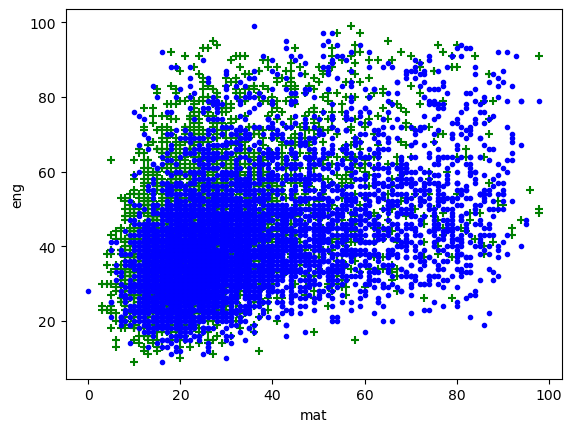

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xlabel('mat')
plt.ylabel('eng')
plt.scatter(df_all['score_mat'], df_all['score'],color="green",marker='+')
plt.scatter(df_all['score_eng'], df_all['score'],color="blue",marker='.')

In [62]:
from sklearn.model_selection import train_test_split

x = df_all[['s_score_mat', 's_score_eng']]
y = df_all[['s_score']]

y = np.ravel(y)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [64]:
X_train.shape

(4339, 2)

In [65]:
len(X_test)

1085

In [66]:
from sklearn.svm import SVC
model = SVC(kernel='rbf', gamma=0.5, C=1.0)

In [67]:
model.fit(X_train, y_train)

SVC(gamma=0.5)

In [68]:
y.shape 

(5424,)

In [69]:
model.score(X_test, y_test)

0.029493087557603687

In [71]:
model.predict([[800, 451.0]])

/Users/nemekhbayarnomin/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([560.])

In [72]:
df_all.sample(1)

,rank_mat,student_id,score_mat,s_score_mat,proportion_mat,grade_mat,rank_eng,score_eng,s_score_eng,proportion_eng,grade_eng,rank,score,s_score,proportion,grade
4170,8288 = 8705,312400292,16,410,18.51,D-,7598 = 7948,24.0,460.0,34.53,D,7756 = 8057,28.0,408.0,18.0,D-


In [73]:
model.predict([[410, 24.0]])

/Users/nemekhbayarnomin/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([493.])

In [79]:
from sklearn.linear_model import LinearRegression


linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)


LinearRegression()

In [81]:
y_pred = linear_reg.predict(X_test)

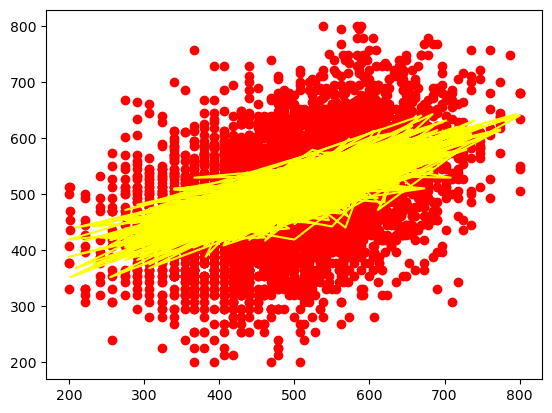

In [88]:
import matplotlib.pyplot as plt

plt.scatter(x['s_score_eng'], y, color = 'red')
plt.plot(X_test, y_pred, color = 'yellow')

In [87]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.23501229570205573